In [2]:
import tensorflow

Depedancies required: 1.tensorflow, 2.opencv,

3.mediapipe: after we have defined the points, mediapipe helps in locating them in the video

4.sklearn: for evaluation matrix and train test split

5.matplotlib : for data visualization

In [3]:
!pip install opencv-python mediapipe sklearn matplotlib

  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=3ef3b9e195bdb5de91a157ea0dd52ef07b712bce1b1226d41f86e4856ed331c1
  Stored in directory: c:\users\ainap\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [4]:
!pip install tensorflow-gpu==2.4.1

  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ainap\\AppData\\Local\\Temp\\pip-uninstall-9etyu58u\\defs.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [8]:
import cv2
import numpy as np #different arrays and structuring of datasets
from matplotlib import pyplot as plt
import os #helps in exploring and accessing file paths
import time
import mediapipe as mp

In [9]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

OpenCV reads in the form of BGR and for media pipe we 
need it in the form of RGB hence we do this ...

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
    #They are hand landmarks,pose landmarks and face landmarks

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

468

In [70]:
draw_landmarks(frame,results)

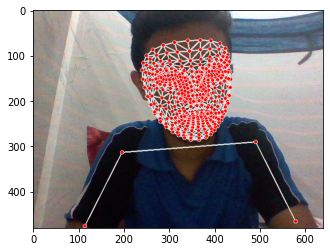

In [73]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

### Extracting the keypoint values that we just laid down above

In [13]:
#Creating a numpy array which is consolidation of all the various landmarks. 
#Flatten just flattens the list to one array 
#If you don't have any landmarks for a partcular case (For eg your left hand never appeared in the frame, we supply a numpy zeroes array in that case)
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [14]:
#extracting key points and converting into numpy array
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh]) #concatenates all the landmarks and returns the concatenated list

In [9]:
extract_keypoints(results).shape

(1662,)

## SETUP FOLDERS for data collection

##### Action detection: A key difference between action detection and other computer vision related tasks is that a sequence of data is used for detection rather than a single frame.

In [15]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [9]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) #makes a dir in our cwd for hello, iloveyou and thanks
        except:
            pass

# Collect keypoints for testing and training
# Essentially we are saving each frame as a numpy array

1. Read the frame via mediapipe and show the keypoints via the function draw_styled_landmarks

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    ######################################################## NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)
                # Draw landmarks
                draw_styled_landmarks(image, results)
        
                ###################################### NEW Apply wait logic
                if frame_num == 0: 
                    #outputting text on the screen for the user's convenience 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500) #1.5 seconds
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# Preprocess the data
# Create labels and features

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
#creation of a dummy variable
label_map={label:num for num,label in enumerate(actions)}

In [14]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [16]:
sequences, labels = [], [] #x variable and y variable respectively
for action in actions: 
    for sequence in range(no_sequences): #There are 30 sequences
        window = [] #represents all of the frames for that particular sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) #loading the np array frame
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
np.array(sequences).shape


(90, 30, 1662)

In [19]:
X= np.array(sequences) #created x variable

In [20]:
X.shape

(90, 30, 1662)

In [23]:
y=to_categorical(labels).astype(int) # One hot encoded representation # created y variable

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [26]:
X_train.shape

(85, 30, 1662)

# Build and Train LSTM Neural Network
#### We imported three dependancies for building our model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard #tensorboard helps to monitor your training and accuracy

In [18]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [19]:
model = Sequential() #instantiating the model
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # the piece de resistance
#the activation SOFTMAX gives us an array of probabilities that sum up to ONE. The max prob will be the label predicted.

# Result:
If we get a result which looks like this res=[0.7,0.2,0.1] then argmax(res) will be calculated.
If we perform : actions[argmax(res)] then 'hello' would be returned. Essentially it looks at argmax(res) as [1,0,0]

In [20]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#When we are working with multiclass classification model, we use this loss model.
#When we have binary classification we use binary_crossentropy 
#When we are working with regression with the neural network, we use mean squared error

In [34]:
model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback])

Epoch 1/1500
3/3 [==============================] - 8s 518ms/step - loss: 2.1680 - categorical_accuracy: 0.2941
Epoch 2/1500
3/3 [==============================] - 0s 118ms/step - loss: 1.1342 - categorical_accuracy: 0.3647
Epoch 3/1500
3/3 [==============================] - 0s 109ms/step - loss: 1.1647 - categorical_accuracy: 0.3294
Epoch 4/1500
3/3 [==============================] - 0s 117ms/step - loss: 1.0247 - categorical_accuracy: 0.3765
Epoch 5/1500
3/3 [==============================] - 0s 119ms/step - loss: 3.0796 - categorical_accuracy: 0.3412
Epoch 6/1500
3/3 [==============================] - 0s 116ms/step - loss: 2.8077 - categorical_accuracy: 0.2941
Epoch 7/1500
3/3 [==============================] - 0s 108ms/step - loss: 1.1324 - categorical_accuracy: 0.3294
Epoch 8/1500
3/3 [==============================] - 0s 117ms/step - loss: 1.1166 - categorical_accuracy: 0.3294
Epoch 9/1500
3/3 [==============================] - 0s 104ms/step - loss: 1.1117 - categorical_accuracy:

3/3 [==============================] - 0s 135ms/step - loss: 0.0968 - categorical_accuracy: 0.9647
Epoch 146/1500
3/3 [==============================] - 0s 139ms/step - loss: 0.0811 - categorical_accuracy: 0.9647
Epoch 147/1500
3/3 [==============================] - 0s 121ms/step - loss: 0.0766 - categorical_accuracy: 0.9765
Epoch 148/1500
3/3 [==============================] - 0s 129ms/step - loss: 0.0873 - categorical_accuracy: 0.9765
Epoch 149/1500
3/3 [==============================] - 0s 128ms/step - loss: 0.0990 - categorical_accuracy: 0.9647
Epoch 150/1500
3/3 [==============================] - 0s 131ms/step - loss: 0.2164 - categorical_accuracy: 0.8941
Epoch 151/1500
3/3 [==============================] - 0s 134ms/step - loss: 0.2191 - categorical_accuracy: 0.9412
Epoch 152/1500
3/3 [==============================] - 0s 134ms/step - loss: 0.1075 - categorical_accuracy: 0.9647
Epoch 153/1500
3/3 [==============================] - 0s 135ms/step - loss: 0.1141 - categorical_accura

3/3 [==============================] - 0s 91ms/step - loss: 0.0244 - categorical_accuracy: 0.9882
Epoch 218/1500
3/3 [==============================] - 0s 98ms/step - loss: 0.0261 - categorical_accuracy: 0.9882
Epoch 219/1500
3/3 [==============================] - 0s 129ms/step - loss: 0.0663 - categorical_accuracy: 0.9882
Epoch 220/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.1410 - categorical_accuracy: 0.9412
Epoch 221/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.1297 - categorical_accuracy: 0.9647
Epoch 222/1500
3/3 [==============================] - 0s 118ms/step - loss: 0.1879 - categorical_accuracy: 0.9412
Epoch 223/1500
3/3 [==============================] - 0s 187ms/step - loss: 0.3535 - categorical_accuracy: 0.8941
Epoch 224/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.5170 - categorical_accuracy: 0.8941
Epoch 225/1500
3/3 [==============================] - 0s 113ms/step - loss: 0.1523 - categorical_accuracy

3/3 [==============================] - 0s 119ms/step - loss: 0.0441 - categorical_accuracy: 0.9882
Epoch 290/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.0433 - categorical_accuracy: 0.9882
Epoch 291/1500
3/3 [==============================] - 0s 119ms/step - loss: 0.0429 - categorical_accuracy: 0.9882
Epoch 292/1500
3/3 [==============================] - 0s 101ms/step - loss: 0.0412 - categorical_accuracy: 0.9882
Epoch 293/1500
3/3 [==============================] - 0s 123ms/step - loss: 0.0400 - categorical_accuracy: 0.9882
Epoch 294/1500
3/3 [==============================] - 0s 120ms/step - loss: 0.0401 - categorical_accuracy: 0.9882
Epoch 295/1500
3/3 [==============================] - 0s 143ms/step - loss: 0.0439 - categorical_accuracy: 0.9882
Epoch 296/1500
3/3 [==============================] - 0s 119ms/step - loss: 0.0404 - categorical_accuracy: 0.9882
Epoch 297/1500
3/3 [==============================] - 0s 120ms/step - loss: 0.0474 - categorical_accura

3/3 [==============================] - 0s 117ms/step - loss: 0.1283 - categorical_accuracy: 0.9882
Epoch 362/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.1229 - categorical_accuracy: 0.9765
Epoch 363/1500
3/3 [==============================] - 0s 101ms/step - loss: 0.1029 - categorical_accuracy: 0.9882
Epoch 364/1500
3/3 [==============================] - 0s 123ms/step - loss: 0.0836 - categorical_accuracy: 0.9882
Epoch 365/1500
3/3 [==============================] - 0s 113ms/step - loss: 0.0705 - categorical_accuracy: 0.9882
Epoch 366/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.0601 - categorical_accuracy: 0.9882
Epoch 367/1500
3/3 [==============================] - 0s 117ms/step - loss: 0.0546 - categorical_accuracy: 0.9882
Epoch 368/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.0531 - categorical_accuracy: 0.9882
Epoch 369/1500
3/3 [==============================] - 0s 120ms/step - loss: 0.0512 - categorical_accura

3/3 [==============================] - 0s 150ms/step - loss: 0.1432 - categorical_accuracy: 0.9529
Epoch 434/1500
3/3 [==============================] - 0s 97ms/step - loss: 0.1595 - categorical_accuracy: 0.9765
Epoch 435/1500
3/3 [==============================] - 0s 121ms/step - loss: 0.0805 - categorical_accuracy: 0.9765
Epoch 436/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.0711 - categorical_accuracy: 0.9882
Epoch 437/1500
3/3 [==============================] - 0s 97ms/step - loss: 0.0665 - categorical_accuracy: 0.9882
Epoch 438/1500
3/3 [==============================] - 0s 117ms/step - loss: 0.0724 - categorical_accuracy: 0.9882
Epoch 439/1500
3/3 [==============================] - 0s 117ms/step - loss: 0.0620 - categorical_accuracy: 0.9882
Epoch 440/1500
3/3 [==============================] - 0s 111ms/step - loss: 0.0580 - categorical_accuracy: 0.9882
Epoch 441/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.0484 - categorical_accuracy

3/3 [==============================] - 1s 153ms/step - loss: 0.3090 - categorical_accuracy: 0.8941
Epoch 506/1500
3/3 [==============================] - 0s 97ms/step - loss: 0.1732 - categorical_accuracy: 0.9059
Epoch 507/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.1519 - categorical_accuracy: 0.9765
Epoch 508/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.2125 - categorical_accuracy: 0.9765
Epoch 509/1500
3/3 [==============================] - 0s 96ms/step - loss: 0.1347 - categorical_accuracy: 0.9765
Epoch 510/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.1109 - categorical_accuracy: 0.9647
Epoch 511/1500
3/3 [==============================] - 0s 98ms/step - loss: 0.0793 - categorical_accuracy: 0.9882
Epoch 512/1500
3/3 [==============================] - 0s 105ms/step - loss: 0.0870 - categorical_accuracy: 0.9882
Epoch 513/1500
3/3 [==============================] - 0s 106ms/step - loss: 0.0848 - categorical_accuracy: 

3/3 [==============================] - 0s 125ms/step - loss: 0.0114 - categorical_accuracy: 1.0000
Epoch 649/1500
3/3 [==============================] - 0s 121ms/step - loss: 0.0106 - categorical_accuracy: 1.0000
Epoch 650/1500
3/3 [==============================] - 0s 118ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 651/1500
3/3 [==============================] - 0s 118ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 652/1500
3/3 [==============================] - 0s 121ms/step - loss: 0.0085 - categorical_accuracy: 1.0000
Epoch 653/1500
3/3 [==============================] - 0s 121ms/step - loss: 0.0086 - categorical_accuracy: 1.0000
Epoch 654/1500
3/3 [==============================] - 0s 121ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 655/1500
3/3 [==============================] - 0s 120ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 656/1500
3/3 [==============================] - 0s 122ms/step - loss: 0.0066 - categorical_accura

3/3 [==============================] - 0s 120ms/step - loss: 6.1020e-05 - categorical_accuracy: 1.0000
Epoch 788/1500
3/3 [==============================] - 0s 107ms/step - loss: 6.0396e-05 - categorical_accuracy: 1.0000
Epoch 789/1500
3/3 [==============================] - 0s 117ms/step - loss: 5.9726e-05 - categorical_accuracy: 1.0000
Epoch 790/1500
3/3 [==============================] - 0s 109ms/step - loss: 5.9195e-05 - categorical_accuracy: 1.0000
Epoch 791/1500
3/3 [==============================] - 0s 113ms/step - loss: 5.8769e-05 - categorical_accuracy: 1.0000
Epoch 792/1500
3/3 [==============================] - 0s 116ms/step - loss: 5.7797e-05 - categorical_accuracy: 1.0000
Epoch 793/1500
3/3 [==============================] - 0s 112ms/step - loss: 5.7365e-05 - categorical_accuracy: 1.0000
Epoch 794/1500
3/3 [==============================] - 0s 162ms/step - loss: 5.6750e-05 - categorical_accuracy: 1.0000
Epoch 795/1500
3/3 [==============================] - 0s 125ms/step - l

3/3 [==============================] - 0s 112ms/step - loss: 2.0821e-05 - categorical_accuracy: 1.0000
Epoch 926/1500
3/3 [==============================] - 0s 142ms/step - loss: 2.0657e-05 - categorical_accuracy: 1.0000
Epoch 927/1500
3/3 [==============================] - 0s 119ms/step - loss: 2.0518e-05 - categorical_accuracy: 1.0000
Epoch 928/1500
3/3 [==============================] - 0s 114ms/step - loss: 2.0413e-05 - categorical_accuracy: 1.0000
Epoch 929/1500
3/3 [==============================] - 0s 111ms/step - loss: 2.0247e-05 - categorical_accuracy: 1.0000
Epoch 930/1500
3/3 [==============================] - 0s 116ms/step - loss: 2.0169e-05 - categorical_accuracy: 1.0000
Epoch 931/1500
3/3 [==============================] - 0s 108ms/step - loss: 2.0016e-05 - categorical_accuracy: 1.0000
Epoch 932/1500
3/3 [==============================] - 0s 117ms/step - loss: 1.9905e-05 - categorical_accuracy: 1.0000
Epoch 933/1500
3/3 [==============================] - 0s 113ms/step - l

3/3 [==============================] - 1s 150ms/step - loss: 1.0324e-05 - categorical_accuracy: 1.0000
Epoch 1064/1500
3/3 [==============================] - 1s 219ms/step - loss: 1.0286e-05 - categorical_accuracy: 1.0000
Epoch 1065/1500
3/3 [==============================] - 0s 129ms/step - loss: 1.0232e-05 - categorical_accuracy: 1.0000
Epoch 1066/1500
3/3 [==============================] - 0s 130ms/step - loss: 1.0189e-05 - categorical_accuracy: 1.0000
Epoch 1067/1500
3/3 [==============================] - 0s 136ms/step - loss: 1.0136e-05 - categorical_accuracy: 1.0000
Epoch 1068/1500
3/3 [==============================] - 1s 214ms/step - loss: 1.0112e-05 - categorical_accuracy: 1.0000
Epoch 1069/1500
3/3 [==============================] - 0s 141ms/step - loss: 1.0053e-05 - categorical_accuracy: 1.0000
Epoch 1070/1500
3/3 [==============================] - 0s 130ms/step - loss: 1.0003e-05 - categorical_accuracy: 1.0000
Epoch 1071/1500
3/3 [==============================] - 1s 218ms/

Epoch 1132/1500
3/3 [==============================] - 1s 183ms/step - loss: 7.7860e-06 - categorical_accuracy: 1.0000
Epoch 1133/1500
3/3 [==============================] - 0s 134ms/step - loss: 7.7537e-06 - categorical_accuracy: 1.0000
Epoch 1134/1500
3/3 [==============================] - 1s 234ms/step - loss: 7.7257e-06 - categorical_accuracy: 1.0000
Epoch 1135/1500
3/3 [==============================] - 1s 237ms/step - loss: 7.6906e-06 - categorical_accuracy: 1.0000
Epoch 1136/1500
3/3 [==============================] - 1s 214ms/step - loss: 7.6626e-06 - categorical_accuracy: 1.0000
Epoch 1137/1500
3/3 [==============================] - 1s 223ms/step - loss: 7.6387e-06 - categorical_accuracy: 1.0000
Epoch 1138/1500
3/3 [==============================] - 1s 163ms/step - loss: 7.5995e-06 - categorical_accuracy: 1.0000
Epoch 1139/1500
3/3 [==============================] - 0s 167ms/step - loss: 7.5798e-06 - categorical_accuracy: 1.0000
Epoch 1140/1500
3/3 [===========================

3/3 [==============================] - 0s 115ms/step - loss: 4.6672e-06 - categorical_accuracy: 1.0000
Epoch 1270/1500
3/3 [==============================] - 0s 119ms/step - loss: 4.6518e-06 - categorical_accuracy: 1.0000
Epoch 1271/1500
3/3 [==============================] - 0s 124ms/step - loss: 4.6364e-06 - categorical_accuracy: 1.0000
Epoch 1272/1500
3/3 [==============================] - 0s 123ms/step - loss: 4.6209e-06 - categorical_accuracy: 1.0000
Epoch 1273/1500
3/3 [==============================] - 0s 119ms/step - loss: 4.6083e-06 - categorical_accuracy: 1.0000
Epoch 1274/1500
3/3 [==============================] - 0s 140ms/step - loss: 4.5915e-06 - categorical_accuracy: 1.0000
Epoch 1275/1500
3/3 [==============================] - 1s 141ms/step - loss: 4.5831e-06 - categorical_accuracy: 1.0000
Epoch 1276/1500
3/3 [==============================] - 0s 84ms/step - loss: 4.5592e-06 - categorical_accuracy: 1.0000
Epoch 1277/1500
3/3 [==============================] - 0s 173ms/s

Epoch 1338/1500
3/3 [==============================] - 0s 116ms/step - loss: 3.4780e-06 - categorical_accuracy: 1.0000
Epoch 1339/1500
3/3 [==============================] - 0s 124ms/step - loss: 3.4598e-06 - categorical_accuracy: 1.0000
Epoch 1340/1500
3/3 [==============================] - 0s 111ms/step - loss: 3.4499e-06 - categorical_accuracy: 1.0000
Epoch 1341/1500
3/3 [==============================] - 0s 104ms/step - loss: 3.4331e-06 - categorical_accuracy: 1.0000
Epoch 1342/1500
3/3 [==============================] - 0s 100ms/step - loss: 3.4191e-06 - categorical_accuracy: 1.0000
Epoch 1343/1500
3/3 [==============================] - 0s 107ms/step - loss: 3.4037e-06 - categorical_accuracy: 1.0000
Epoch 1344/1500
3/3 [==============================] - 0s 97ms/step - loss: 3.3882e-06 - categorical_accuracy: 1.0000
Epoch 1345/1500
3/3 [==============================] - 0s 122ms/step - loss: 3.3728e-06 - categorical_accuracy: 1.0000
Epoch 1346/1500
3/3 [============================

Epoch 1475/1500
3/3 [==============================] - 0s 125ms/step - loss: 2.2383e-06 - categorical_accuracy: 1.0000
Epoch 1476/1500
3/3 [==============================] - 0s 121ms/step - loss: 2.2299e-06 - categorical_accuracy: 1.0000
Epoch 1477/1500
3/3 [==============================] - 0s 114ms/step - loss: 2.2271e-06 - categorical_accuracy: 1.0000
Epoch 1478/1500
3/3 [==============================] - 0s 114ms/step - loss: 2.2172e-06 - categorical_accuracy: 1.0000
Epoch 1479/1500
3/3 [==============================] - 0s 109ms/step - loss: 2.2116e-06 - categorical_accuracy: 1.0000
Epoch 1480/1500
3/3 [==============================] - 0s 140ms/step - loss: 2.2032e-06 - categorical_accuracy: 1.0000
Epoch 1481/1500
3/3 [==============================] - 0s 118ms/step - loss: 2.1962e-06 - categorical_accuracy: 1.0000
Epoch 1482/1500
3/3 [==============================] - 0s 109ms/step - loss: 2.1892e-06 - categorical_accuracy: 1.0000
Epoch 1483/1500
3/3 [===========================

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# Prediction 
## Using test model to check the accuracy of the model

In [48]:
result=model.predict(X_test)
actions[np.argmax(result[3])]

'iloveyou'

In [49]:
actions[np.argmax(y_test[3])]

'iloveyou'

## Saving the model weights 

#### This means that if we delete the model, the next time when we have to use the model, we need not train the model we can just use the weights saved in the h5 file.
For example:
RUN the cell where the model is instantiated

RUN the cell where we compile the model

RUN this: model.load_weights('Action_hackathon.h5')

In [24]:
model.save("Action_hackathon.h5")

In [25]:
model.load_weights('Action_hackathon.h5')

# Evaluating the confusion matrix and accuracy

In [52]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [53]:
yhat=model.predict(X_test)

In [54]:
#conversion
#This converts the predictions from their one hot encoded value to categorical variable 

ytrue=np.argmax(y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

# Multilabel Confusion matrix
### matrix is organised as follows:- 
####    true negative        false positive

####    false negative      true positive

###### So essentially we hope for a diagonal matrix 

In [56]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [58]:
accuracy_score(ytrue,yhat)

1.0

## Lets check it for training data now

In [7]:
yhat1=model.predict(X_train)

NameError: name 'model' is not defined

In [65]:
ytrue1=np.argmax(y_train,axis=1).tolist()
yhat1=np.argmax(yhat1,axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue1,yhat1)

array([[[57,  0],
        [ 0, 28]],

       [[55,  0],
        [ 0, 30]],

       [[58,  0],
        [ 0, 27]]], dtype=int64)

In [67]:
accuracy_score(ytrue1,yhat1)

1.0

# TESTING THE MODEL IN REAL TIME

In [71]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [5]:
from flask import Flask
app=Flask(__name__)

In [1]:
@app.route('/index',methods='POST')
def MAINFUNC():
    # 1. New detection variables
    sequence = [] #collection our thirty frames to generate a prediction
    sentence = [] #helps to concantenate the history of our decisions together
    predictions=[]
    threshold = 0.5

    cap = cv2.VideoCapture(0)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # 2. Prediction logic
            keypoints = extract_keypoints(results)
    #         sequence.insert(0,keypoints)
    #         sequence = sequence[:30]
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0] # FOOTNOTE
                        # USE OF expand_dims
                        #X_test[0].shape has the value 30, 1662
                        #The shape that the model is expecting is (1,30,1662)
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))


            #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res): #This provided more stability to the model during the transition of the move
                    if res[np.argmax(res)] > threshold: #checking if the prob is greater than the threshold
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities #DYNAMIC RECTANGLE
                image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

In [27]:
import pickle
with open('model.pickle', 'wb') as file:
      pickle.dump(model, file)

TypeError: cannot pickle 'weakref' object

#Foot note